<a href="https://colab.research.google.com/github/jotaven/Busca-em-imagens/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytesseract
!sudo apt install tesseract-ocr
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/raw/main/eng.traineddata

!mkdir imagens

!mkdir imagens_busca

!mkdir fontes
!wget -O ./fontes/calibri.ttf https://github.com/sthemonica/text-recognize/raw/main/Imagens/calibri.ttf

mkdir: cannot create directory ‘tessdata’: File exists
--2023-05-09 15:35:23--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2023-05-09 15:35:23--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15336931 (15M) [application/octet-stream]
Saving to: ‘./tessdata/por.traineddata’

./tessdata/por.trai 100%[===================>]  14.63M  93.7MB/s    in 0.2s    

2023-05-09 15:35:23 (93.7 MB/s) - ‘.

In [3]:
import os
import pytesseract
import cv2
import numpy as np

from PIL import ImageFont, Image, ImageDraw
from pytesseract import Output
from google.colab.patches import cv2_imshow


In [4]:
projetoImagens = "/content/imagens"
caminho = [os.path.join(projetoImagens, f) for f in os.listdir(projetoImagens)]

In [5]:
caminho

['/content/imagens/imagem_2023-05-09_113052531.png',
 '/content/imagens/imagem_2023-05-09_120820341.png',
 '/content/imagens/.ipynb_checkpoints',
 '/content/imagens/imagem_2023-05-09_113114211.png']

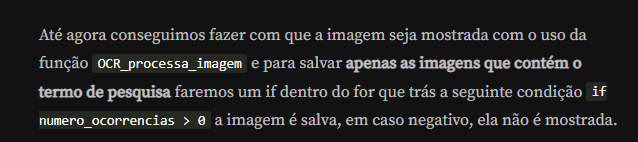

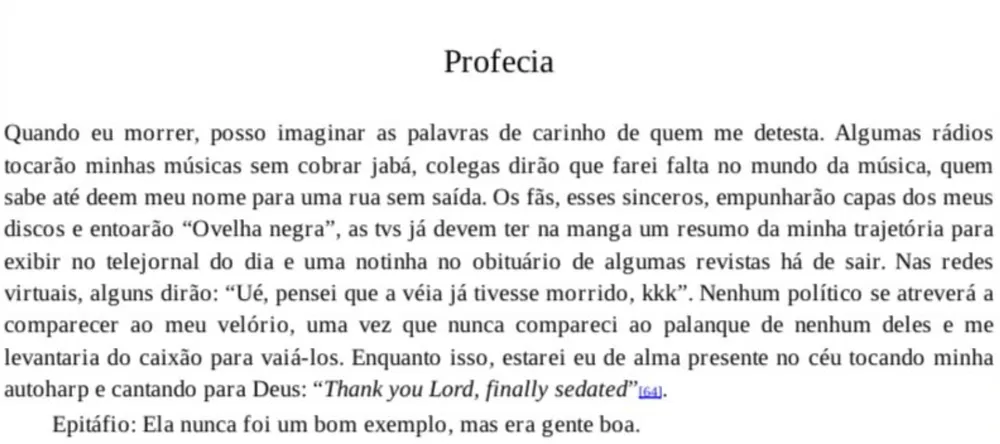

In [6]:
for imagem in caminho:
  if '.ipynb' in imagem:
    caminho.remove(imagem)
    continue
    
  img = cv2.imread(imagem)
  cv2_imshow(img)

In [7]:
fonte_dir = "/content/fontes/calibri.ttf"

In [8]:
def caixa_texto(i, img, resultado, cor=(0, 0, 255)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x, y), (x+w, y+h), cor, 2)
  return img, x, y

In [9]:
def escreve_texto(texto, img, x, y, fonte, tamanho_fonte=14, cor=(0, 0, 255)):
  fonte = ImageFont.truetype(fonte, tamanho_fonte)
  img_pill = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pill)
  draw.text((x, y-tamanho_fonte), texto, fill=cor, font=fonte)
  img = np.array(img_pill)

  return img

In [10]:
def ocr_processa(img, termo_pesquisa, lang, tessconfig, min_conf):
  resultado = pytesseract.image_to_data(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), lang=lang, config=tessconfig, output_type=Output.DICT)
  num_ocorrencias = 0

  for i in range(len(resultado['text'])):
    if resultado['conf'][i] > min_conf:
      texto = resultado['text'][i]
      if termo_pesquisa in texto:
        img, x, y = caixa_texto(i, img, resultado)
        img = escreve_texto(texto, img, x, y, fonte_dir)
        num_ocorrencias += 1

  return img, num_ocorrencias




In [11]:
termo_pesquisa = "mundo"


imagem_2023-05-09_113052531.png



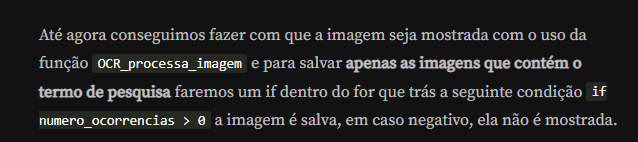

Ocorrencias: 0

imagem_2023-05-09_120820341.png



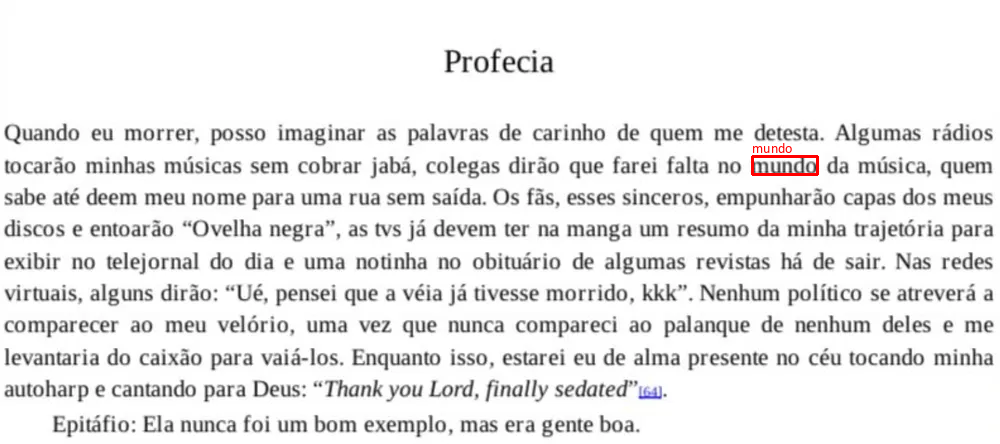

Ocorrencias: 1

imagem_2023-05-09_113114211.png



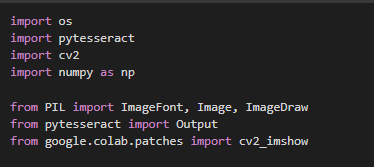

Ocorrencias: 0


In [12]:
config_tesseract = "--tessdata-dir tessdata"
idioma = "por"

confianca_minima = 40 #@param {type: 'slider', min: 0, max: 100}

for imagem in caminho:
  nome_imagem = os.path.split(imagem)[-1]
  print("====================\n")
  print(f"{nome_imagem}\n")

  img = cv2.imread(imagem)
  img, num_ocorrencias = ocr_processa(img, termo_pesquisa, idioma, config_tesseract, confianca_minima)
  cv2_imshow(img)

  if num_ocorrencias > 0:
    novo_nome_imagem = "OCR_" + nome_imagem
    nova_imagem = "imagens_busca/" + novo_nome_imagem
    cv2.imwrite(nova_imagem, img)

  print(f"Ocorrencias: {num_ocorrencias}")